In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/diet_data/cleaned_data.csv',low_memory=False)

In [ ]:
df.head(3)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,"c(""Into a 1 quart Jar with tight fitting lid, ..."


In [ ]:
df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeInstructions'],
      dtype='object')

In [ ]:
df = df.drop(columns=['RecipeId','AuthorId', 'AuthorName', 'CookTime', 'PrepTime','TotalTime', 'DatePublished', 'Images','RecipeIngredientQuantities','AggregatedRating', 'ReviewCount','SaturatedFatContent','RecipeServings'])  # Specify 'columns' argument to drop a column

In [ ]:
df.columns

Index(['Name', 'Description', 'RecipeCategory', 'Keywords',
       'RecipeIngredientParts', 'Calories', 'FatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'RecipeInstructions'],
      dtype='object')

In [ ]:
df.shape

(522518, 14)

In [ ]:
df.isnull().sum()

,0
Name,0
Description,0
RecipeCategory,0
Keywords,0
RecipeIngredientParts,0
Calories,0
FatContent,0
CholesterolContent,1
SodiumContent,1
CarbohydrateContent,1


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Name,0
Description,0
RecipeCategory,0
Keywords,0
RecipeIngredientParts,0
Calories,0
FatContent,0
CholesterolContent,0
SodiumContent,0
CarbohydrateContent,0


In [ ]:
#finding duplicates
df.duplicated().sum()

347

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
df.describe()

,CholesterolContent,SodiumContent,FiberContent,SugarContent,ProteinContent
count,522169.000000,5.221690e+05,522169.000000,522169.00000,522169.000000
mean,86.501025,7.671240e+02,3.843323,21.87653,17.470624
std,302.078029,4.202015e+03,8.604683,142.65663,40.138175
min,0.000000,0.000000e+00,0.000000,0.00000,0.000000
25%,3.800000,1.233000e+02,0.800000,2.50000,3.500000
50%,42.600000,3.533000e+02,2.200000,6.40000,9.100000
75%,107.900000,7.922000e+02,4.600000,17.90000,25.000000
max,130456.400000,1.246921e+06,3012.000000,90682.30000,18396.200000


In [ ]:
# Replace 0 and blank spaces with a specified value (e.g., NaN
df.replace([0, ''], pd.NA, inplace=True)


In [ ]:
# Count the number of NaN values in each column
na_counts = df.isna().sum()

# Convert the Series to a DataFrame for better readability
na_counts_data = na_counts.reset_index()
na_counts_data.columns = ['Column', 'NA Count']

# Display the result
print(na_counts_data)

                   Column  NA Count
0                    Name         0
1             Description         0
2          RecipeCategory         0
3                Keywords         0
4   RecipeIngredientParts         0
5                Calories         0
6              FatContent         0
7      CholesterolContent    110319
8           SodiumContent      3028
9     CarbohydrateContent         0
10           FiberContent     26984
11           SugarContent     11797
12         ProteinContent      8401
13     RecipeInstructions         0


In [ ]:
# Drop rows that contain any NaN values
df.dropna(inplace=True)

In [ ]:
df.shape

(392698, 14)

In [ ]:
# Count the number of NaN values in each column
na_counts = df.isna().sum()

# Convert the Series to a DataFrame for better readability
na_counts_data = na_counts.reset_index()
na_counts_data.columns = ['Column', 'NA Count']

# Display the result
print(na_counts_data)

                   Column  NA Count
0                    Name         0
1             Description         0
2          RecipeCategory         0
3                Keywords         0
4   RecipeIngredientParts         0
5                Calories         0
6              FatContent         0
7      CholesterolContent         0
8           SodiumContent         0
9     CarbohydrateContent         0
10           FiberContent         0
11           SugarContent         0
12         ProteinContent         0
13     RecipeInstructions         0


In [ ]:
df.head(20)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
5,Best Blackbottom Pie,Make and share this Best Blackbottom Pie recip...,Pie,"c(""Dessert"", ""Weeknight"", ""Stove Top"", ""< 4 Ho...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",437.9,19.3,94.3,267.6,58,1.8,42.5,7.0,"c(""Graham Cracker Crust: In small bowl, combin..."
6,Warm Chicken A La King,I copied this one out of a friend's book so ma...,Chicken,"c(""Poultry"", ""Meat"", ""< 60 Mins"")","c(""chicken"", ""butter"", ""flour"", ""milk"", ""celer...",895.5,66.8,405.8,557.2,29.1,3.1,5.0,45.3,"c(""Melt 1 1/2 ozs butter, add the flour and co..."
7,Buttermilk Pie With Gingersnap Crumb Crust,Make and share this Buttermilk Pie With Ginger...,Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228,7.1,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
9,Butter Pecan Cookies,Make and share this Butter Pecan Cookies recip...,Dessert,"c(""Cookie & Brownie"", ""Fruit"", ""Nuts"", ""Weekni...","c(""butter"", ""brown sugar"", ""granulated sugar"",...",69,5.6,6.3,15.0,4.5,0.6,1.6,0.8,"c(""Preheat oven to 350 degrees."", ""Cream butte..."
10,Boston Cream Pie,Make and share this Boston Cream Pie recipe fr...,Pie,"c(""Dessert"", ""Weeknight"", ""Oven"", ""< 4 Hours"")","c(""margarine"", ""cake flour"", ""baking powder"", ...",688.2,36.4,105.9,722.3,84,1.6,46.2,8.8,"c(""Beat egg whites until soft peaks form."", ""G..."
11,Chicken Breasts Lombardi,Make and share this Chicken Breasts Lombardi r...,Chicken Breast,"c(""Chicken"", ""Poultry"", ""Meat"", ""European"", ""V...","c(""fresh mushrooms"", ""butter"", ""boneless skinl...",627.7,24.9,203.0,848.9,13.7,0.6,2.0,57.9,"c(""Cook mushrooms in 2 tbsp butter in a large ..."
12,Biscotti Di Prato,Make and share this Biscotti Di Prato recipe f...,Dessert,"c(""Cookie & Brownie"", ""European"", ""Weeknight"",...","c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
15,Jimmy G's Carrot Cake,Make and share this Jimmy G's Carrot Cake reci...,Dessert,"c(""Pineapple"", ""Tropical Fruits"", ""Fruit"", ""We...","c(""all-purpose flour"", ""sugar"", ""baking powder...",372.9,10.6,62.0,190.0,66.2,3.4,40.9,6.6,"c(""Grease and lightly flour 2 9x1 1/2-inch rou..."


mealtype

In [ ]:
import pandas as pd
import numpy as np

# Define keyword mappings for meal types based on observations
def classify_mealtype(row):
    recipe_category = row['RecipeCategory'].lower()
    keywords = row['Keywords'].lower()

    # Assign meal types based on keywords in RecipeCategory or Keywords columns
    if any(word in recipe_category for word in ['breakfast', 'scones']):
        return 'Breakfast'
    elif any(word in recipe_category for word in ['lunch', 'snacks', 'sandwich']):
        return 'Lunch'
    elif any(word in recipe_category for word in ['beverage', 'smoothies', 'punch', 'shakes']):
        return 'Beverages'
    elif any(word in recipe_category for word in ['dinner', 'chicken', 'meat', 'steak', 'curries', 'stew']):
        return 'Dinner'
    elif any(word in recipe_category for word in ['dessert', 'cookies', 'pie', 'cake', 'brownie', 'candy']):
        return 'Dessert'
    else:
        # Check Keywords if not already categorized
        if 'breakfast' in keywords:
            return 'Breakfast'
        elif 'lunch' in keywords or 'snack' in keywords:
            return 'Lunch'
        elif 'dinner' in keywords:
            return 'Dinner'
        elif 'dessert' in keywords:
            return 'Dessert'
        elif 'beverage' in keywords:
            return 'Beverages'
        else:
            return 'Other'

# Apply the classification function
df['MealType'] = df.apply(classify_mealtype, axis=1)

# Display the unique meal types and sample data
print(df['MealType'].unique())
print(df[['Name', 'RecipeCategory', 'Keywords', 'MealType']].head())

# Optional: Save the modified dataset
df.to_csv('/content/drive/MyDrive/recipes/recipe_meal', index=False)


['Dessert' 'Dinner' 'Other' 'Breakfast' 'Lunch' 'Beverages']
                                         Name   RecipeCategory  \
0           Low-Fat Berry Blue Frozen Dessert  Frozen Desserts   
1                                     Biryani   Chicken Breast   
5                        Best Blackbottom Pie              Pie   
6                      Warm Chicken A La King          Chicken   
7  Buttermilk Pie With Gingersnap Crumb Crust              Pie   

                                            Keywords MealType  
0  c("Dessert", "Low Protein", "Low Cholesterol",...  Dessert  
1  c("Chicken Thigh & Leg", "Chicken", "Poultry",...   Dinner  
5  c("Dessert", "Weeknight", "Stove Top", "< 4 Ho...  Dessert  
6                  c("Poultry", "Meat", "< 60 Mins")   Dinner  
7  c("Dessert", "Healthy", "Weeknight", "Oven", "...  Dessert  


In [ ]:
import pandas as pd
import numpy as np

# Define the nutrient limits (max values)
max_Calories = 3000
max_daily_fat = 100
max_daily_Cholesterol = 300
max_daily_Sodium = 2300
max_daily_Carbohydrate = 325
max_daily_Fiber = 40
max_daily_Sugar = 40
max_daily_Protein = 185

# Define ranges for each nutrient (using percentiles of max values)
nutrient_ranges = {
    'Calories': [0, max_Calories * 0.1, max_Calories * 0.2, max_Calories * 0.5, max_Calories],
    'FatContent': [0, max_daily_fat * 0.1, max_daily_fat * 0.2, max_daily_fat * 0.5, max_daily_fat],
    'CholesterolContent': [0, max_daily_Cholesterol * 0.1, max_daily_Cholesterol * 0.2, max_daily_Cholesterol * 0.5, max_daily_Cholesterol],
    'SodiumContent': [0, max_daily_Sodium * 0.1, max_daily_Sodium * 0.2, max_daily_Sodium * 0.5, max_daily_Sodium],
    'CarbohydrateContent': [0, max_daily_Carbohydrate * 0.1, max_daily_Carbohydrate * 0.2, max_daily_Carbohydrate * 0.5, max_daily_Carbohydrate],
    'FiberContent': [0, max_daily_Fiber * 0.1, max_daily_Fiber * 0.2, max_daily_Fiber * 0.5, max_daily_Fiber],
    'SugarContent': [0, max_daily_Sugar * 0.1, max_daily_Sugar * 0.2, max_daily_Sugar * 0.5, max_daily_Sugar],
    'ProteinContent': [0, max_daily_Protein * 0.1, max_daily_Protein * 0.2, max_daily_Protein * 0.5, max_daily_Protein],
}

# Labels for ranges
range_labels = ['Low', 'Medium', 'High', 'Very High']

# Function to apply ranges
def apply_range(value, bins, labels):
    for i in range(len(bins) - 1):
        if bins[i] <= value < bins[i + 1]:
            return labels[i]
    return 'Unknown'  # Return 'Unknown' if value is outside the expected range

# Load your DataFrame (ensure this is defined somewhere in your actual code)
# df = pd.read_csv('path_to_your_dataframe.csv')

# Apply ranges to all nutrient columns and replace nutrient values
for nutrient, bins in nutrient_ranges.items():
    # Convert the column to numeric, errors='coerce' will replace non-numeric values with NaN
    df[nutrient] = pd.to_numeric(df[nutrient], errors='coerce')
    df[nutrient] = df[nutrient].apply(lambda x: apply_range(x, bins, range_labels))

# Create a mapping from categorical to numerical values
range_to_numeric = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4, 'Unknown': 0}

# Convert the categorical ranges to numerical values directly in the nutrient columns
for nutrient in nutrient_ranges.keys():
    df[nutrient] = df[nutrient].map(range_to_numeric)

# Display the dataframe with the numerical ranges
print(df.head())

# Save the updated dataset with numerical ranges
df.to_csv('/content/drive/MyDrive/diet_data/last1.csv.csv', index=False)


                                         Name  \
0           Low-Fat Berry Blue Frozen Dessert   
1                                     Biryani   
5                        Best Blackbottom Pie   
6                      Warm Chicken A La King   
7  Buttermilk Pie With Gingersnap Crumb Crust   

                                         Description   RecipeCategory  \
0  Make and share this Low-Fat Berry Blue Frozen ...  Frozen Desserts   
1  Make and share this Biryani recipe from Food.com.   Chicken Breast   
5  Make and share this Best Blackbottom Pie recip...              Pie   
6  I copied this one out of a friend's book so ma...          Chicken   
7  Make and share this Buttermilk Pie With Ginger...              Pie   

                                            Keywords  \
0  c("Dessert", "Low Protein", "Low Cholesterol",...   
1  c("Chicken Thigh & Leg", "Chicken", "Poultry",...   
5  c("Dessert", "Weeknight", "Stove Top", "< 4 Ho...   
6                  c("Poultry", "Meat", "<

In [ ]:
df.head(5)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,MealType
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",1,1,1,1,2,1,4,1,"c(""Toss 2 cups berries with sugar."", ""Let stan...",Dessert
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""saffron"", ""milk"", ""hot green chili peppers""...",3,4,0,2,3,3,4,3,"c(""Soak saffron in warm milk for 5 minutes and...",Dinner
5,Best Blackbottom Pie,Make and share this Best Blackbottom Pie recip...,Pie,"c(""Dessert"", ""Weeknight"", ""Stove Top"", ""< 4 Ho...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",2,2,3,2,2,1,0,1,"c(""Graham Cracker Crust: In small bowl, combin...",Dessert
6,Warm Chicken A La King,I copied this one out of a friend's book so ma...,Chicken,"c(""Poultry"", ""Meat"", ""< 60 Mins"")","c(""chicken"", ""butter"", ""flour"", ""milk"", ""celer...",3,4,0,3,1,1,2,3,"c(""Melt 1 1/2 ozs butter, add the flour and co...",Dinner
7,Buttermilk Pie With Gingersnap Crumb Crust,Make and share this Buttermilk Pie With Ginger...,Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",1,1,1,2,2,1,4,1,"c(""Preheat oven to 350°F."", ""Make pie crust, u...",Dessert


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/diet_data/last1.csv.csv')

In [ ]:
df.head(5)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,MealType
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",1,1,1,1,2,1,4,1,"c(""Toss 2 cups berries with sugar."", ""Let stan...",Dessert
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""saffron"", ""milk"", ""hot green chili peppers""...",3,4,0,2,3,3,4,3,"c(""Soak saffron in warm milk for 5 minutes and...",Dinner
2,Best Blackbottom Pie,Make and share this Best Blackbottom Pie recip...,Pie,"c(""Dessert"", ""Weeknight"", ""Stove Top"", ""< 4 Ho...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",2,2,3,2,2,1,0,1,"c(""Graham Cracker Crust: In small bowl, combin...",Dessert
3,Warm Chicken A La King,I copied this one out of a friend's book so ma...,Chicken,"c(""Poultry"", ""Meat"", ""< 60 Mins"")","c(""chicken"", ""butter"", ""flour"", ""milk"", ""celer...",3,4,0,3,1,1,2,3,"c(""Melt 1 1/2 ozs butter, add the flour and co...",Dinner
4,Buttermilk Pie With Gingersnap Crumb Crust,Make and share this Buttermilk Pie With Ginger...,Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",1,1,1,2,2,1,4,1,"c(""Preheat oven to 350°F."", ""Make pie crust, u...",Dessert


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df'
# Replace 0 values with NaN
df.replace(0, np.nan, inplace=True)

# To verify the changes
print(df.head())

                                         Name  \
0           Low-Fat Berry Blue Frozen Dessert   
1                                     Biryani   
2                        Best Blackbottom Pie   
3                      Warm Chicken A La King   
4  Buttermilk Pie With Gingersnap Crumb Crust   

                                         Description   RecipeCategory  \
0  Make and share this Low-Fat Berry Blue Frozen ...  Frozen Desserts   
1  Make and share this Biryani recipe from Food.com.   Chicken Breast   
2  Make and share this Best Blackbottom Pie recip...              Pie   
3  I copied this one out of a friend's book so ma...          Chicken   
4  Make and share this Buttermilk Pie With Ginger...              Pie   

                                            Keywords  \
0  c("Dessert", "Low Protein", "Low Cholesterol",...   
1  c("Chicken Thigh & Leg", "Chicken", "Poultry",...   
2  c("Dessert", "Weeknight", "Stove Top", "< 4 Ho...   
3                  c("Poultry", "Meat", "<

In [ ]:
# Count the number of NaN values in each column
na_counts = df.isna().sum()

# Convert the Series to a DataFrame for better readability
na_counts_data = na_counts.reset_index()
na_counts_data.columns = ['Column', 'NA Count']

# Display the result
print(na_counts_data)

                   Column  NA Count
0                    Name         0
1             Description         0
2          RecipeCategory         0
3                Keywords         0
4   RecipeIngredientParts         0
5                Calories      6670
6              FatContent     14709
7      CholesterolContent     23266
8           SodiumContent     18611
9     CarbohydrateContent      8259
10           FiberContent      1423
11           SugarContent     40476
12         ProteinContent       888
13     RecipeInstructions         0
14               MealType         0


In [ ]:
# Drop rows that contain any NaN values
df.dropna(inplace=True)

In [ ]:
# Count the number of NaN values in each column
na_counts = df.isna().sum()

# Convert the Series to a DataFrame for better readability
na_counts_data = na_counts.reset_index()
na_counts_data.columns = ['Column', 'NA Count']

# Display the result
print(na_counts_data)

                   Column  NA Count
0                    Name         0
1             Description         0
2          RecipeCategory         0
3                Keywords         0
4   RecipeIngredientParts         0
5                Calories         0
6              FatContent         0
7      CholesterolContent         0
8           SodiumContent         0
9     CarbohydrateContent         0
10           FiberContent         0
11           SugarContent         0
12         ProteinContent         0
13     RecipeInstructions         0
14               MealType         0


In [ ]:
df.shape

(326403, 14)

In [ ]:
#save the cleaned data to drive
df.to_csv('/content/drive/MyDrive/diet_data/last2.csv', index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/diet_data/last2.csv')

In [ ]:
df.head(2)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,MealType
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",1.0,1.0,1.0,1.0,2.0,1.0,4.0,1.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",Dessert
1,Buttermilk Pie With Gingersnap Crumb Crust,Make and share this Buttermilk Pie With Ginger...,Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,"c(""Preheat oven to 350°F."", ""Make pie crust, u...",Dessert


In [ ]:
df.isnull().sum()

,0
Name,0
Description,0
RecipeCategory,0
Keywords,0
RecipeIngredientParts,0
Calories,0
FatContent,0
CholesterolContent,0
SodiumContent,0
CarbohydrateContent,0


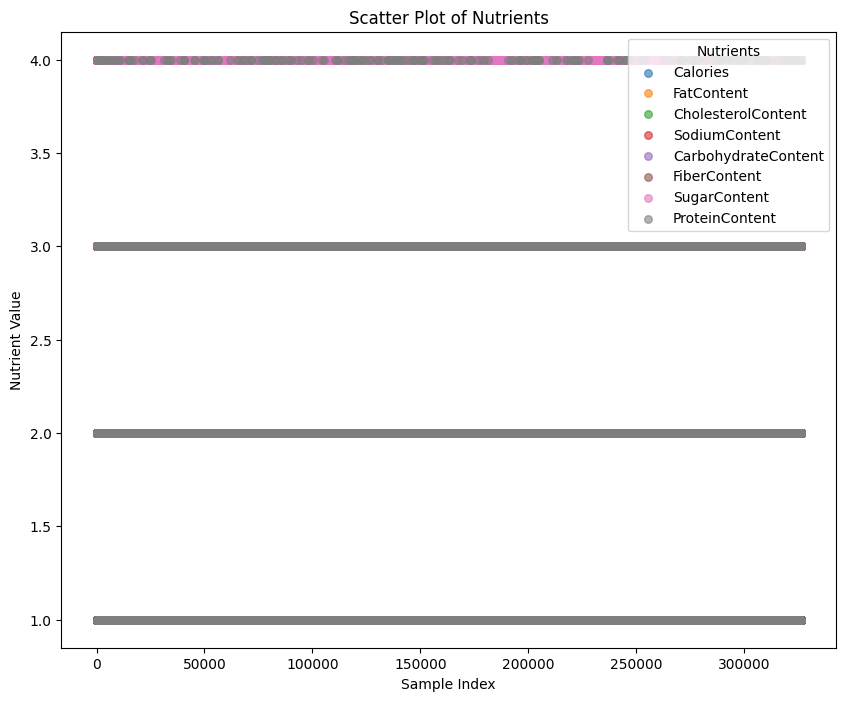

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named df
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                    'SugarContent', 'ProteinContent']
nutrients_df = df[nutrient_columns]

# Create a scatter plot for each nutrient column against the row index
plt.figure(figsize=(10, 8))
for nutrient in nutrient_columns:
    plt.scatter(nutrients_df.index, nutrients_df[nutrient], label=nutrient, alpha=0.6, s=30)

plt.title('Scatter Plot of Nutrients')
plt.xlabel('Sample Index')
plt.ylabel('Nutrient Value')
plt.legend(title="Nutrients", loc="upper right")  # Set a fixed legend location to avoid the warning
plt.show()


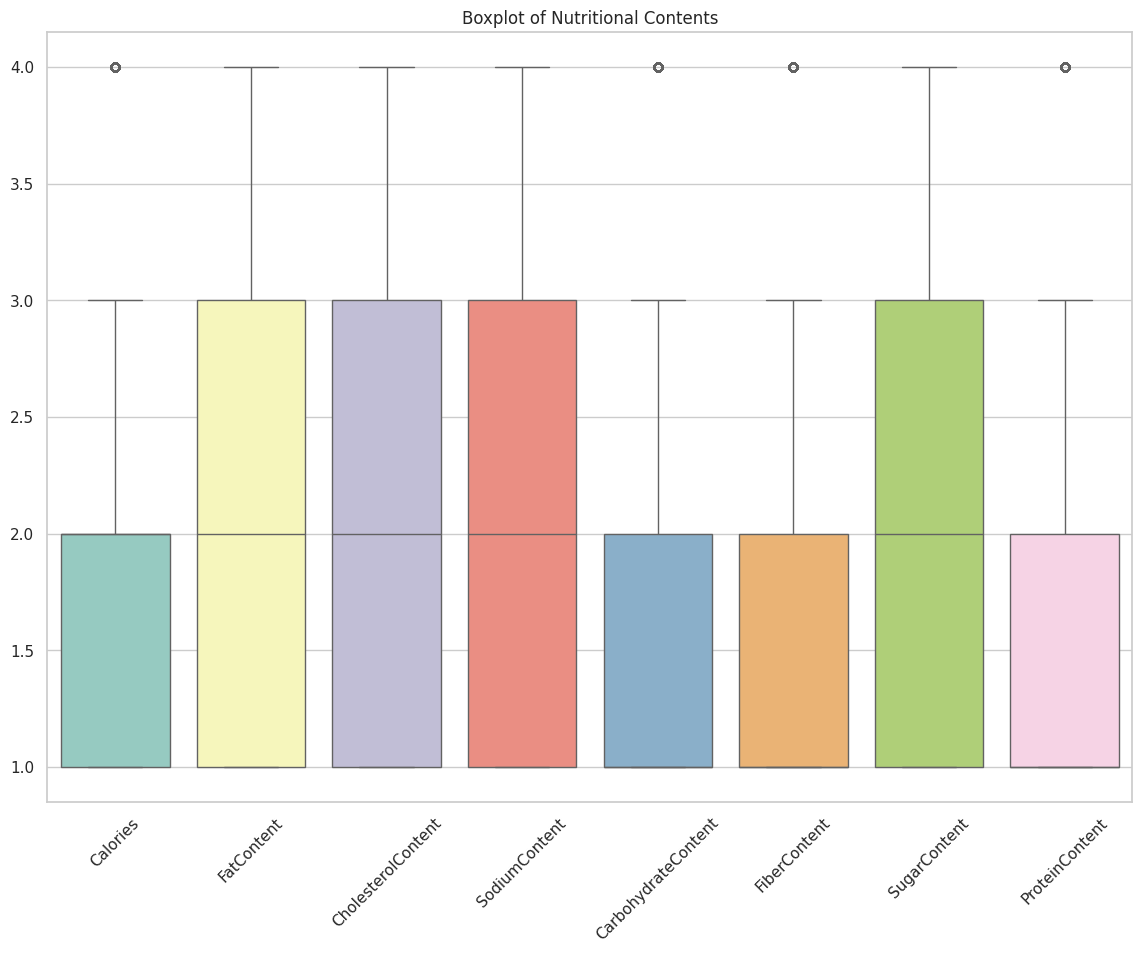

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the list of columns to visualize
columns = ['Calories', 'FatContent', 'CholesterolContent',
           'SodiumContent', 'CarbohydrateContent', 'FiberContent',
           'SugarContent', 'ProteinContent']

# Plot boxplots for each nutrient
plt.figure(figsize=(14, 10))
sns.boxplot(data=df[columns], palette="Set3")
plt.xticks(rotation=45)
plt.title('Boxplot of Nutritional Contents')
plt.show()

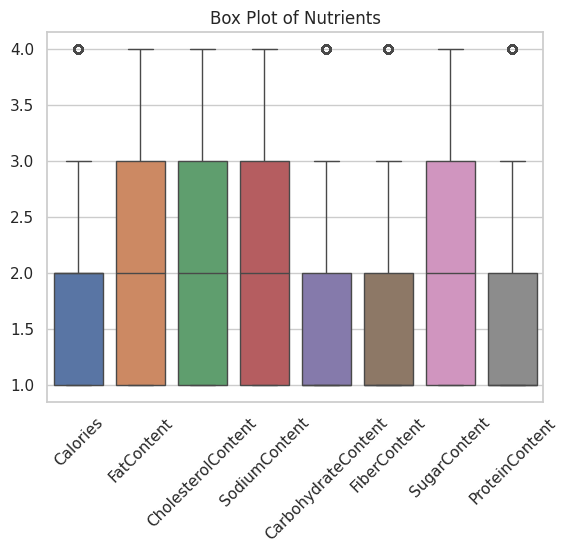

In [ ]:
import seaborn as sns

nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                    'SugarContent', 'ProteinContent']

nutrients_df = df[nutrient_columns]

sns.set(style='whitegrid')
sns.boxplot(data=nutrients_df)
plt.title('Box Plot of Nutrients')
plt.xticks(rotation=45)
plt.show()

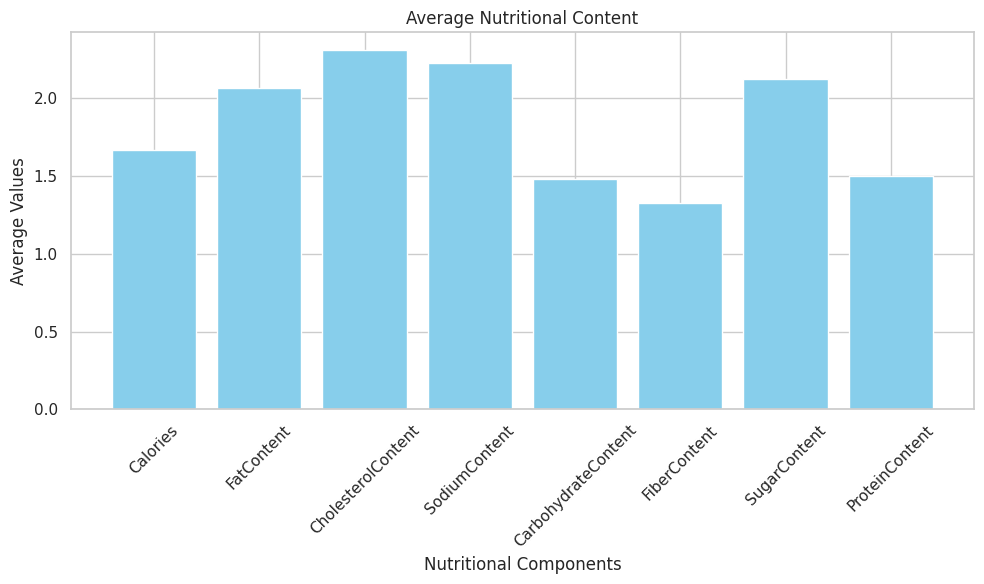

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data1'
columns_to_plot = ['Calories', 'FatContent', 'CholesterolContent',
                   'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                   'SugarContent', 'ProteinContent']

# Calculate the mean values for the selected columns
mean_values = df[columns_to_plot].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(mean_values.index, mean_values.values, color='skyblue')
plt.xlabel('Nutritional Components')
plt.ylabel('Average Values')
plt.title('Average Nutritional Content')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()       # Adjust the layout to prevent label cut-off
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


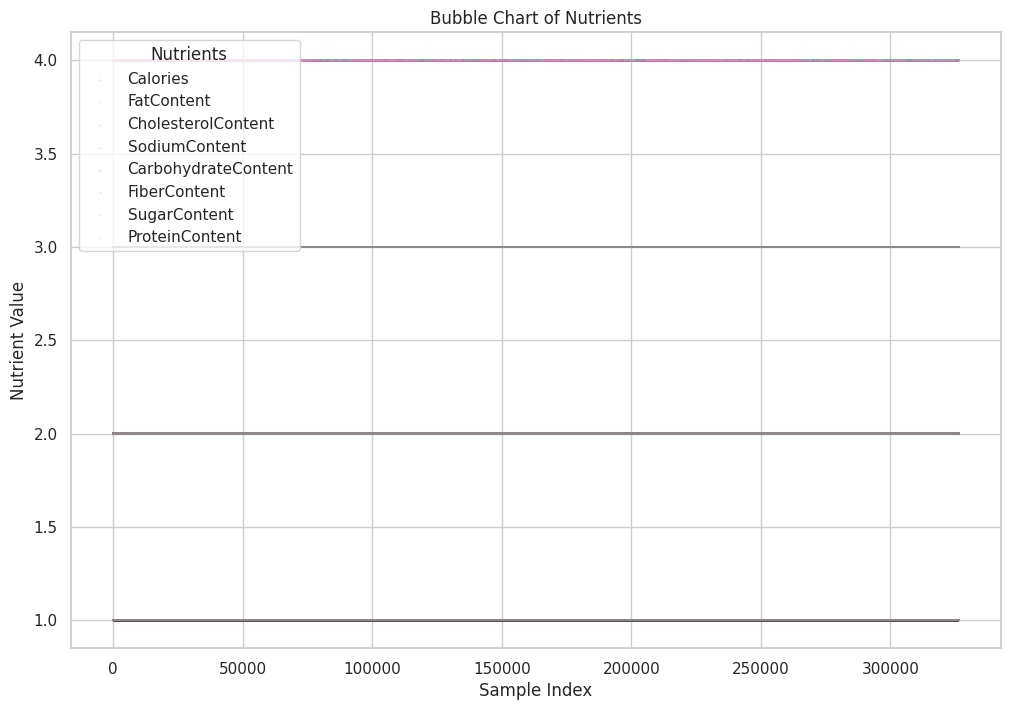

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a DataFrame named df
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                    'SugarContent', 'ProteinContent']
nutrients_df = df[nutrient_columns]

# Create a bubble chart for each nutrient column against the row index
plt.figure(figsize=(12, 8))

# Use different colors and bubble sizes based on nutrient values
for nutrient in nutrient_columns:
    plt.scatter(nutrients_df.index, nutrients_df[nutrient],
                s=nutrients_df[nutrient] / 50,  # Adjust the divisor to control bubble size
                alpha=0.6, label=nutrient)

plt.title('Bubble Chart of Nutrients')
plt.xlabel('Sample Index')
plt.ylabel('Nutrient Value')
plt.legend(title="Nutrients")
plt.show()


In [ ]:
df.drop(columns=['Description'], inplace=True)

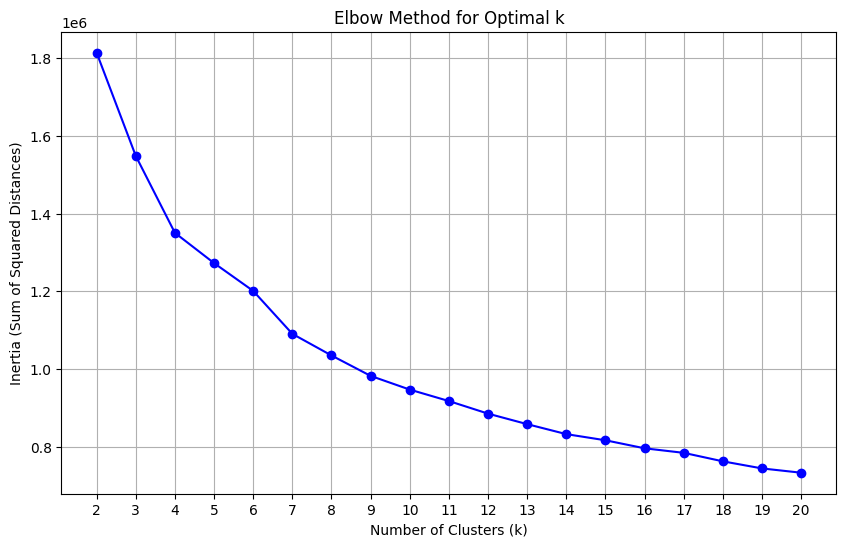

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                    'SugarContent', 'ProteinContent']

# Ensure the nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in nutrient columns
df.dropna(subset=nutrient_columns, inplace=True)

# Extract features (X)
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply the Elbow Method with k from 2 to 20
inertia = []  # List to store the sum of squared distances (inertia) for each number of clusters
cluster_range = range(2, 21)  # Set the range from 2 to 20

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot the inertia to visualize the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

# Select nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                    'SugarContent', 'ProteinContent']

# Ensure the nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in nutrient columns
df.dropna(subset=nutrient_columns, inplace=True)

# Split the data into features (X)
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train the KMeans model using KMeans++ initialization
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)  # You can choose the number of clusters
kmeans.fit(X_train)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Predict cluster labels for the test set
y_pred = kmeans.predict(X_test)

# Evaluate the model's performance using silhouette score
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.2530


In [ ]:
# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.predict(scaler.transform(df[nutrient_columns]))

In [ ]:
df.head(5)

,Name,RecipeCategory,Keywords,RecipeIngredientParts,Calories,FatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,MealType,Cluster
0,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ...",1.0,1.0,1.0,1.0,2.0,1.0,4.0,1.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",Dessert,0
1,Buttermilk Pie With Gingersnap Crumb Crust,Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,"c(""Preheat oven to 350°F."", ""Make pie crust, u...",Dessert,0
2,Butter Pecan Cookies,Dessert,"c(""Cookie & Brownie"", ""Fruit"", ""Nuts"", ""Weekni...","c(""butter"", ""brown sugar"", ""granulated sugar"",...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"c(""Preheat oven to 350 degrees."", ""Cream butte...",Dessert,2
3,Chicken Breasts Lombardi,Chicken Breast,"c(""Chicken"", ""Poultry"", ""Meat"", ""European"", ""V...","c(""fresh mushrooms"", ""butter"", ""boneless skinl...",3.0,3.0,4.0,3.0,1.0,1.0,1.0,3.0,"c(""Cook mushrooms in 2 tbsp butter in a large ...",Dinner,1
4,Biscotti Di Prato,Dessert,"c(""Cookie & Brownie"", ""European"", ""Weeknight"",...","c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo...",Dessert,2


In [ ]:
import joblib

# Save the KMeans model
joblib.dump(kmeans, '/content/drive/MyDrive/recipes/kmeans_diet.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/recipes/scaler_diet.pkl')  # Save the scaler as well for future use

# Optionally, save the updated DataFrame with cluster labels
df.to_csv('/content/drive/MyDrive/recipes/recipes_diet.csv', index=False)

In [ ]:
joblib.dump(scaler, '/content/drive/MyDrive/recipes/scaledData.pkl')

['/content/drive/MyDrive/recipes/scaledData.pkl']

In [ ]:
import pandas as pd
import joblib

# Load the pre-trained KMeans model and scaler
kmeans_model = joblib.load('/content/drive/MyDrive/recipes/kmeans_diet.pkl')
scaler = joblib.load('/content/drive/MyDrive/recipes/scaler_diet.pkl')

# Load the recipes DataFrame
df = pd.read_csv('/content/drive/MyDrive/recipes/recipes_diet.csv')

def recommend_recipes(nutrient_ranges):
    # Define a mapping for nutrient ranges to numerical values
    nutrient_mapping = {
        'low': 1,
        'medium': 2,
        'high': 3,
        'very high': 4
    }

    # Extract nutrient values from nutrient_ranges dictionary and map to numerical values
    user_nutrients = {
        'Calories': nutrient_mapping.get(nutrient_ranges['Calories']),
        'FatContent': nutrient_mapping.get(nutrient_ranges['FatContent']),
        'CholesterolContent': nutrient_mapping.get(nutrient_ranges['CholesterolContent']),
        'SodiumContent': nutrient_mapping.get(nutrient_ranges['SodiumContent']),
        'CarbohydrateContent': nutrient_mapping.get(nutrient_ranges['CarbohydrateContent']),
        'FiberContent': nutrient_mapping.get(nutrient_ranges['FiberContent']),
        'SugarContent': nutrient_mapping.get(nutrient_ranges['SugarContent']),
        'ProteinContent': nutrient_mapping.get(nutrient_ranges['ProteinContent'])
    }

    # Convert user nutrients to DataFrame with correct column names
    user_nutrients_df = pd.DataFrame([user_nutrients])

    # Scale the user nutrient data
    user_nutrients_scaled = scaler.transform(user_nutrients_df)

    # Predict the cluster for the user input
    cluster_label = kmeans_model.predict(user_nutrients_scaled)[0]

    # Filter recipes by the predicted cluster
    filtered_recipes = df[df['Cluster'] == cluster_label]

    # Group by MealType and sample 3 recipes for each type (excluding "Other")
    recommended_recipes = filtered_recipes[filtered_recipes['MealType'] != 'Other'].groupby('MealType').apply(lambda x: x.sample(n=3, replace=True)).reset_index(drop=True)

    # Return recipe names, instructions, and meal types
    return recommended_recipes[['Name', 'RecipeInstructions', 'MealType', 'Cluster']]

# Function to get user input for nutrient ranges
def get_user_input():
    nutrient_ranges = {}
    nutrient_labels = ['Calories', 'FatContent', 'CholesterolContent',
                       'SodiumContent', 'CarbohydrateContent',
                       'FiberContent', 'SugarContent', 'ProteinContent']

    print("Please enter the nutrient ranges (low, medium, high, very high):")
    for nutrient in nutrient_labels:
        while True:
            value = input(f"{nutrient}: ").strip().lower()
            if value in ['low', 'medium', 'high', 'very high']:
                nutrient_ranges[nutrient] = value
                break
            else:
                print("Invalid input. Please enter one of: low, medium, high, very high.")

    return nutrient_ranges

# Get user input for nutrient ranges
user_input = get_user_input()

# Recommend recipes based on user input
recommended_recipes = recommend_recipes(user_input)

# Display the recommended recipes
print("\nRecommended Recipes based on your nutrient ranges by Meal Type:")
for mealtype in recommended_recipes['MealType'].unique():
    print(f"\nMeal Type: {mealtype}")
    for _, row in recommended_recipes[recommended_recipes['MealType'] == mealtype].iterrows():
        print(f"- {row['Name']}")
        print(f"  Instructions: {row['RecipeInstructions']}\n")


Please enter the nutrient ranges (low, medium, high, very high):
Calories: low
FatContent: medium
CholesterolContent: low
SodiumContent: high
CarbohydrateContent: low
FiberContent: high
SugarContent: low
ProteinContent: medium

Recommended Recipes based on your nutrient ranges by Meal Type:

Meal Type: Beverages
- Amarula Caf&eacute; De Cocoa
  Instructions: c("Pour the hot chocolate, hot black coffee and Butterscotch Schnapps into a latte style coffee glass.", "Add the Amarula Cream to the top and stir gently.")

- Buttered Rum-Spiced Cider
  Instructions: c("In a saucepan, add cider, cloves, nutmeg, ground cinnamon, and cinnamon sticks.", "Bring to a boil over medium-high heat; reduce heat; simmer uncovered for 10 minutes.", "Strain mixture to remove cloves and cinnamon sticks.", "In individual mugs (6 mugs total), place 1 tablespoon butter, 1 tablespoon brown sugar, and 2 tablespoons rum.", "Fill each mug with hot cider; stir.", "Enjoy.")

- Instant Chai Tea Mix
  Instructions: c("M

<ipython-input-48-083decb3fdb4>:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recommended_recipes = filtered_recipes[filtered_recipes['MealType'] != 'Other'].groupby('MealType').apply(lambda x: x.sample(n=3, replace=True)).reset_index(drop=True)


over

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

# Select nutrient columns for clustering
nutrient_columns = ['Calories', 'FatContent', 'CholesterolContent',
                    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                    'SugarContent', 'ProteinContent']

# Ensure the nutrient columns are numeric
df[nutrient_columns] = df[nutrient_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values in nutrient columns
df.dropna(subset=nutrient_columns, inplace=True)

# Split the data into features (X)
X = df[nutrient_columns]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Set to 2 components for visualization, can be adjusted
X_pca = pca.fit_transform(X_scaled)

# Split the reduced dataset into training and testing sets
X_train, X_test = train_test_split(X_pca, test_size=0.2, random_state=42)

# Train the KMeans model using KMeans++ initialization
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_train)

# Predict cluster labels for both train and test sets
train_labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

# Calculate silhouette scores for both train and test sets
train_score = silhouette_score(X_train, train_labels)
test_score = silhouette_score(X_test, test_labels)

print(f"Silhouette Score (Train): {train_score}")
print(f"Silhouette Score (Test): {test_score}")

# # Save the trained model, scaler, and PCA transformer
# joblib.dump(kmeans, "kmeans_model.joblib")
# joblib.dump(scaler, "scaler.joblib")
# joblib.dump(pca, "pca_transformer.joblib")


Silhouette Score (Train): 0.4339930918669851
Silhouette Score (Test): 0.43431078019830205


In [ ]:
# Optionally, save the updated DataFrame with cluster labels
df.to_csv('/content/drive/MyDrive/diet_data/recipes_clusters_last.csv', index=False)

In [ ]:
import pandas as pd
import joblib

# Load the pre-trained KMeans model and scaler
kmeans_model = joblib.load('/content/drive/MyDrive/diet_data/kmeans_model_diet.pkl')
scaler = joblib.load('/content/drive/MyDrive/diet_data/scaler_diet.pkl')

# Load the recipes DataFrame
df = pd.read_csv('/content/drive/MyDrive/diet_data/recipes_clusters_last.csv')

def recommend_recipes(nutrient_ranges):
    # Define a mapping for nutrient ranges to numerical values
    nutrient_mapping = {
        'low': 1,
        'medium': 2,
        'high': 3,
        'very high': 4
    }

    # Extract nutrient values from nutrient_ranges dictionary and map to numerical values
    user_nutrients = {
        'Calories': nutrient_mapping.get(nutrient_ranges['Calories']),
        'FatContent': nutrient_mapping.get(nutrient_ranges['FatContent']),
        'CholesterolContent': nutrient_mapping.get(nutrient_ranges['CholesterolContent']),
        'SodiumContent': nutrient_mapping.get(nutrient_ranges['SodiumContent']),
        'CarbohydrateContent': nutrient_mapping.get(nutrient_ranges['CarbohydrateContent']),
        'FiberContent': nutrient_mapping.get(nutrient_ranges['FiberContent']),
        'SugarContent': nutrient_mapping.get(nutrient_ranges['SugarContent']),
        'ProteinContent': nutrient_mapping.get(nutrient_ranges['ProteinContent'])
    }

    # Convert user nutrients to DataFrame with correct column names
    user_nutrients_df = pd.DataFrame([user_nutrients])

    # Scale the user nutrient data
    user_nutrients_scaled = scaler.transform(user_nutrients_df)

    # Predict the cluster for the user input
    cluster_label = kmeans_model.predict(user_nutrients_scaled)[0]

    # Recommend recipes from the predicted cluster
    recommended_recipes = df[df['Cluster'] == cluster_label].sample(n=3)

    # Return recipe names and instructions
    return recommended_recipes[['Name', 'RecipeInstructions', 'Cluster']]

# Function to get user input for nutrient ranges
def get_user_input():
    nutrient_ranges = {}
    nutrient_labels = ['Calories', 'FatContent', 'CholesterolContent',
                       'SodiumContent', 'CarbohydrateContent',
                       'FiberContent', 'SugarContent', 'ProteinContent']

    print("Please enter the nutrient ranges (low, medium, high, very high):")
    for nutrient in nutrient_labels:
        while True:
            value = input(f"{nutrient}: ").strip().lower()
            if value in ['low', 'medium', 'high', 'very high']:
                nutrient_ranges[nutrient] = value
                break
            else:
                print("Invalid input. Please enter one of: low, medium, high, very high.")

    return nutrient_ranges

# Get user input for nutrient ranges
user_input = get_user_input()

# Recommend recipes based on user input
recommended_recipes = recommend_recipes(user_input)

# Display the recommended recipes
print("\nRecommended Recipes based on your nutrient ranges:")
print(recommended_recipes)


Please enter the nutrient ranges (low, medium, high, very high):
Calories: low
FatContent: low
CholesterolContent: low
SodiumContent: low
CarbohydrateContent: low
FiberContent: low
SugarContent: low
ProteinContent: low

Recommended Recipes based on your nutrient ranges:
                                             Name  \
107253  Seared Ahi Tuna Glazed With Wasabi Butter   
315762                   Pasta Manzo Fungo Ascari   
27678                         Apple Jelly Chicken   

                                       RecipeInstructions  Cluster  
107253  c("Drizzle sesame oil on both sides of each tu...        1  
315762  c("Marinate the minced beef in 2 tblsp of soy ...        1  
27678   c("In a sauce pan, melt the better and combine...        1  
